## Ejemplos de visualización con pandas y matplotib

Comenzamos una de las visualizaciones más frecuentes, las gráficas de líneas, que son adecuadas cuando queremos representar valores en una serie. Veamos un ejemplo:

### Gráficos de líneas

Leemos el fichero seatle_weather

In [52]:
import pandas as pd

In [53]:
df_we = pd.read_csv("ficheros//seattle_weather.csv", sep=',', header='infer')
df_we.head()

,id,date,precipitation,temp_max,temp_min,wind,weather
0,0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,4,2012-01-05,1.3,8.9,2.8,6.1,rain


<AxesSubplot:>

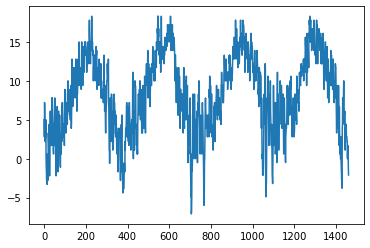

In [54]:
df_we['temp_min'].plot()

Con la función, df_we['temp_min'].plot(), lo que decimos es: en el dataframe df_we, selecciona la columna temp_min y pinta los datos plot(). En la representación que ha realizado Pandas, ha puesto en el eje x los índices (números del 0 al 1460). Podemos darle a la función plot() más información para que represente con más precisión lo que nos interesa.
En la siguiente celda decimos explícitamente qué datos representamos en el eje x sean las fechas y en el eje ylas temperaturas máximas.

<AxesSubplot:xlabel='date'>

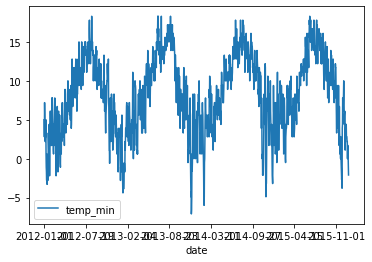

In [55]:
df_we.plot(x='date', y='temp_min')

Aumentamos el __tamaño__ del gráfico

<AxesSubplot:xlabel='date'>

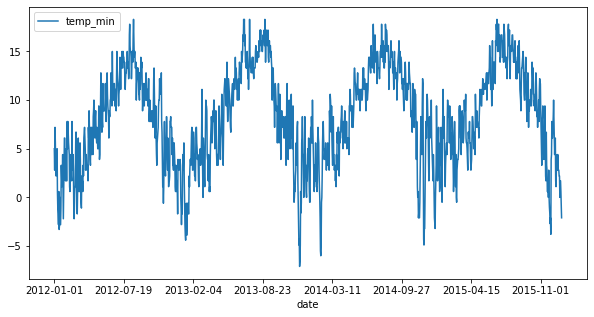

In [56]:
df_we.plot(x='date', y='temp_min',figsize=(10,5))

 Podemos pintar __varias columnas__ de datos en el mismo gráfico:

<AxesSubplot:xlabel='date'>

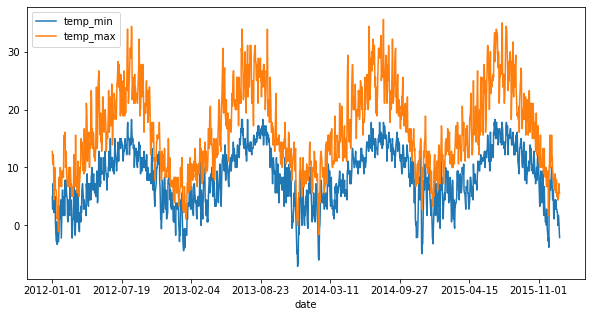

In [57]:
df_we.plot(x='date', y=['temp_min','temp_max'], figsize=(10,5))

Añadimos __título__, __etiquetas__, __ejes__ y __color__:

[Text(0.5, 0, 'Fecha'), Text(0, 0.5, 'º Celsius')]

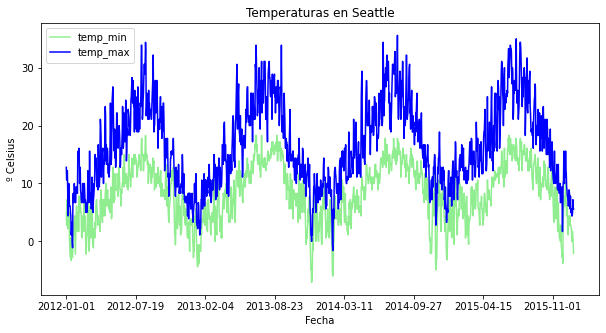

In [58]:
ax = df_we.plot(x='date', y=['temp_min','temp_max'], figsize=(10,5), 
              title='Temperaturas en Seattle',
              color=['lightgreen','blue'])
ax.set(xlabel='Fecha', ylabel='º Celsius')

Interesante también añadir __gráficos compuestos__ que combinen información de varias variables

<AxesSubplot:xlabel='date'>

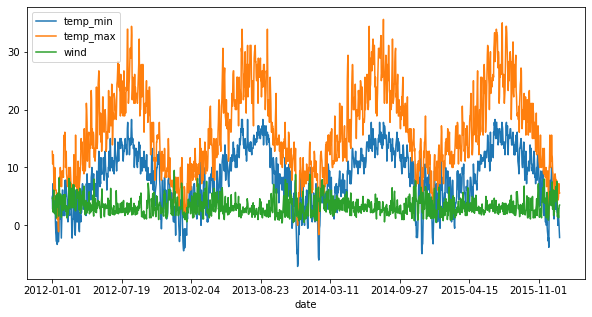

In [59]:
df_we.plot(x='date', y=['temp_min','temp_max', 'wind'], figsize=(10,5))

En el gráfico anterior hay una única escala y nos interesa crear una escala diferente para la variable wind que está en metros por segundo, mientras que la temperatura está en grados celsius

<AxesSubplot:xlabel='date'>

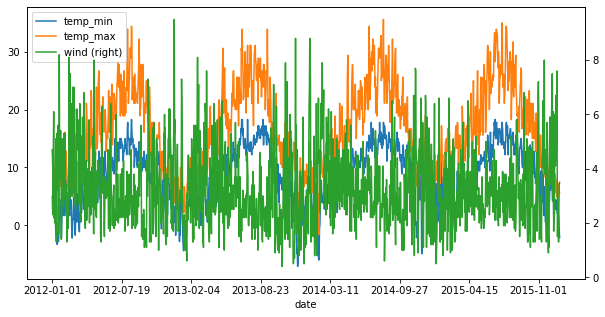

In [60]:
df_we.plot(x='date', y=['temp_min','temp_max', 'wind'], figsize=(10,5), secondary_y='wind')

Una forma de mejorar el gráfico es emplear __trasparencia__ en los colores.Esto se pude hacer añadiendo el parámetro __alpha__ con un valor entre 0 y 1. Un valor de 1 significa opacidad total y un valor de 0 transparencia total

<AxesSubplot:xlabel='date'>

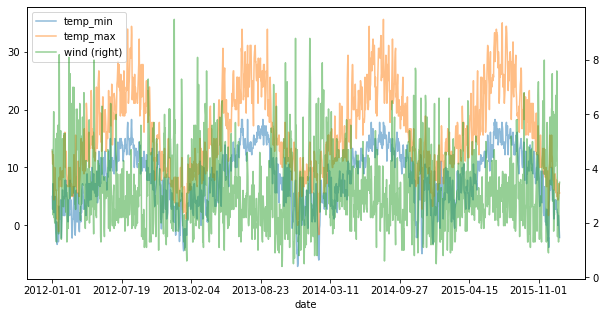

In [51]:
df_we.plot(x='date', y=['temp_min','temp_max', 'wind'], figsize=(10,5), secondary_y='wind', alpha = 0.5)

Igualmente podemos personalizar los límites de los ejes con __ylim__ 

(0.0, 14.0)

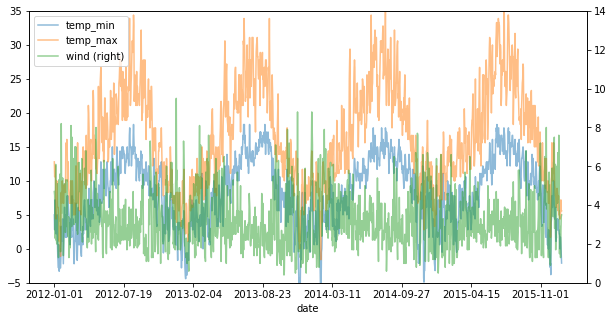

In [65]:
ax = df_we.plot(x='date', y=['temp_min','temp_max', 'wind'], 
           figsize=(10,5), secondary_y='wind', 
           alpha = 0.5, ylim = (-5, 35))
ax.right_ax.set_ylim(0,14) # eje de la derecha

Añadimos las etiquetas

Text(0, 0.5, 'Velocidad viento m/s')

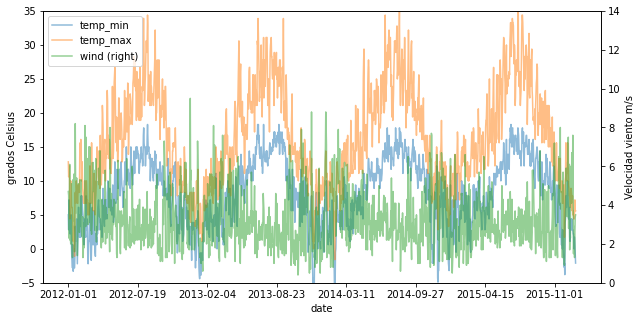

In [67]:
ax = df_we.plot(x='date', y=['temp_min','temp_max', 'wind'], 
           figsize=(10,5), secondary_y='wind', 
           alpha = 0.5, ylim = (-5, 35), ylabel = "grados Celsius")
ax.right_ax.set_ylim(0,14) 
ax.right_ax.set_ylabel("Velocidad viento m/s")

In [72]:
df_we.head()

,id,date,precipitation,temp_max,temp_min,wind,weather
0,0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,4,2012-01-05,1.3,8.9,2.8,6.1,rain


Conversión de fechas

In [74]:
df_we['date2'] = pd.to_datetime(df_we['date'])
df_we.head(), df_we.dtypes

(   id        date  precipitation  temp_max  temp_min  wind  weather      date2
 0   0  2012-01-01            0.0      12.8       5.0   4.7  drizzle 2012-01-01
 1   1  2012-01-02           10.9      10.6       2.8   4.5     rain 2012-01-02
 2   2  2012-01-03            0.8      11.7       7.2   2.3     rain 2012-01-03
 3   3  2012-01-04           20.3      12.2       5.6   4.7     rain 2012-01-04
 4   4  2012-01-05            1.3       8.9       2.8   6.1     rain 2012-01-05,
 id                        int64
 date                     object
 precipitation           float64
 temp_max                float64
 temp_min                float64
 wind                    float64
 weather                  object
 date2            datetime64[ns]
 dtype: object)

Text(0, 0.5, 'Velocidad viento m/s')

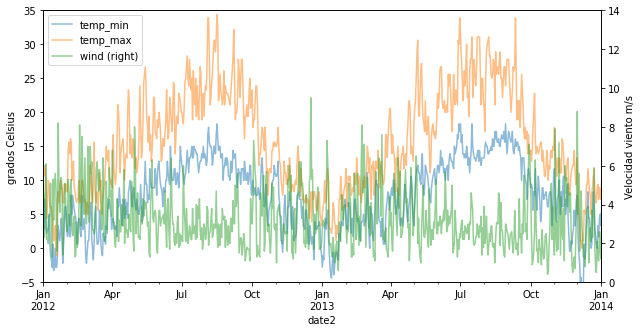

In [91]:
import datetime
ax = df_we.plot(x='date2', y=['temp_min','temp_max', 'wind'], 
           figsize=(10,5), secondary_y='wind', 
           alpha = 0.5, ylim = (-5, 35), xlim = (datetime.date(2012, 1, 1), datetime.date(2014, 1, 1))
          , ylabel = "grados Celsius")
ax.right_ax.set_ylim(0,14) 
ax.right_ax.set_ylabel("Velocidad viento m/s")
#ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2012, 1, 1)])

A continuación vamos a ver la forma de superponer gráficos

In [99]:
df_we['weather'].value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64